# The MNIST (Modified National Institute of Standards and Technology) Task

The MNIST task is a classic problem in the field of deep learning and computer vision. It involves training a model to recognize and classify handwritten digits from 0 to 9. The MNIST dataset is widely used as a benchmark for evaluating and comparing the performance of various machine learning algorithms, especially neural networks.

## Dataset Overview

- **Images**: The dataset contains 70,000 grayscale images of handwritten digits.
- **Training Set**: 60,000 images used for training models.
- **Test Set**: 10,000 images used for evaluating model performance.
- **Image Size**: Each image is 28×28 pixels, resulting in 784 pixels per image.
- **Classes**: 10 classes representing the digits 0 through 9.

## Deep Learning Task

The primary objective is to develop a deep learning model that can accurately classify each image into the correct digit class. This involves several steps:

### Data Preprocessing

- **Normalizing pixel values** to a standard range (e.g., 0 to 1).
- **Reshaping the images** to fit the input requirements of the model.
- Optionally **augmenting the data** to improve model generalization.

### Model Architecture

- **Fully Connected Neural Networks**: Early approaches used multilayer perceptrons with one or more hidden layers.
- **Convolutional Neural Networks (CNNs)**: CNNs are now the standard due to their effectiveness in handling image data.
- **Regularization Techniques**: Methods like dropout and batch normalization are employed to prevent overfitting.

### Training

- **Loss Function**: Typically, categorical cross-entropy is used for multi-class classification.
- **Optimization Algorithms**: Stochastic Gradient Descent (SGD), Adam, or RMSprop optimize the model weights.
- **Evaluation Metrics**: Accuracy is the most common metric, but others like precision, recall, and F1-score can also be used.

### Evaluation

- **Assessing model performance** on the test set.
- **Analyzing misclassified examples** to identify patterns or biases.

## Why MNIST Matters

1. **Benchmarking**: Provides a standard dataset for comparing algorithms.
2. **Educational Value**: Serves as an excellent introduction to image classification and neural networks.
3. **Prototyping**: Allows for quick experimentation due to its manageable size and simplicity.

## Challenges and Considerations

- **Overfitting**: It's easy to achieve near-perfect accuracy, so it's important to ensure the model generalizes well.
- **Baseline Performance**: Even simple models can achieve high accuracy, so improvements may be incremental.
- **Not Representative of Real-world Data**: MNIST is relatively clean and doesn't represent the complexity of real-world images.

## Extensions and Related Tasks

- **Fashion-MNIST**: A drop-in replacement for MNIST with images of clothing items to introduce more complexity.
- **EMNIST**: An extended version that includes both letters and digits.
- **Moving to Complex Datasets**: After mastering MNIST, practitioners often progress to datasets like CIFAR-10, CIFAR-100, or ImageNet for more challenging tasks.

In [1]:
import torch  # PyTorch library for building and training neural networks
import torch.nn as nn  # Contains the building blocks for neural networks (e.g., layers)
import torch.optim as optim  # Provides optimization algorithms like SGD, Adam
import torch.nn.functional as F  # Contains functions for operations like ReLU, softmax, etc.
from torch.utils.data import DataLoader, random_split, Subset  # Utilities for data handling and splitting
from torchvision import datasets, transforms  # Tools for image datasets and transformations
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs and images
import numpy as np  # NumPy for numerical operations
from tqdm import tqdm  # Library for creating progress bars

In [2]:
batch_size = 64           # Number of samples processed before the model's internal parameters are updated.
learning_rate = 0.001     # Step size used by the optimizer to update the model parameters during training.
num_epochs = 10           # Number of times the entire dataset is passed forward and backward through the neural network.
validation_split = 0.1    # Fraction of the training data to be used as the validation set (10% in this case).

- **`batch_size`**: Defines how many samples are processed together before updating the model's parameters. A batch size of 64 means that during training, the model processes 64 images at a time before performing a parameter update.
  
- **`learning_rate`**: Determines the step size for the optimizer during the update of the model's weights. A learning rate of 0.001 indicates that the optimizer makes relatively small adjustments to the weights to ensure gradual convergence during training.

- **`num_epochs`**: Specifies the number of complete passes through the training dataset. For instance, 10 epochs mean the entire dataset will be fed into the model 10 times during training, which helps the model learn progressively.

- **`validation_split`**: Represents the proportion of the training data set aside for validation. In this case, 10% of the training data will be used to evaluate the model's performance on unseen data during the training process, helping to fine-tune hyperparameters and prevent overfitting.

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors scaling values to [0, 1]
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the tensor with mean and std deviation for MNIST
])

- **`transforms.Compose([])`**: This function allows you to chain together multiple image transformations that will be applied sequentially to the input data. In this case, two transformations are being applied to each image in the dataset.

- **`transforms.ToTensor()`**: Converts a PIL image or a NumPy `ndarray` into a PyTorch tensor. This is necessary because PyTorch models operate on tensors. It also scales pixel values from a range of `[0, 255]` to `[0, 1]` for a `uint8` image.

- **`transforms.Normalize((0.1307,), (0.3081,))`**: Normalizes the image tensor by subtracting the mean `(0.1307,)` and dividing by the standard deviation `(0.3081,)` for each channel. These values are specific to the MNIST dataset, where `0.1307` is the mean and `0.3081` is the standard deviation of the pixel values across the entire dataset. Normalization helps to center the data around zero, which can speed up convergence during training.

In [4]:
# Download and load the training dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

- **`datasets.MNIST()`**: This function is used to load the MNIST dataset, which is a collection of 60,000 training images and 10,000 testing images of handwritten digits (0-9).

- **`root='./data'`**: Specifies the directory where the dataset will be stored. If the data is not already in this directory, it will be downloaded there.

- **`train=True`**: Indicates that you want to load the training portion of the dataset. If set to `False`, it would load the test set instead.

- **`download=True`**: If the dataset is not found in the specified `root` directory, setting this to `True` will download it from the internet.

- **`transform=transform`**: Applies the transformations defined earlier (in the `transform` variable) to each image in the dataset. These transformations include converting the images to tensors and normalizing them based on the MNIST dataset's mean and standard deviation.

In [5]:
# Calculate sizes for training and validation
train_size = int((1 - validation_split) * len(dataset))
val_size = len(dataset) - train_size

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

- **Calculate sizes for training and validation:**
  - **`train_size = int((1 - validation_split) * len(dataset))`**: 
    - Computes the number of samples to be used for training.
    - `len(dataset)` gives the total number of samples in the original dataset.
    - `validation_split` is the fraction of data to be used for validation (e.g., 0.1 for 10%).
    - `1 - validation_split` gives the fraction of data to be used for training (e.g., 0.9 for 90%).
    - Multiplying by `len(dataset)` and converting to an integer gives the exact number of samples for the training set.

  - **`val_size = len(dataset) - train_size`**:
    - Calculates the remaining number of samples to be used for the validation set.
    - `val_size` is simply the difference between the total dataset size and the computed `train_size`.

- **Split the dataset:**
  - **`train_dataset, val_dataset = random_split(dataset, [train_size, val_size])`**:
    - Splits the original dataset into two subsets: `train_dataset` and `val_dataset`.
    - `random_split` shuffles the dataset and then divides it according to the specified sizes (`train_size` and `val_size`).
    - `train_dataset` contains the training samples, and `val_dataset` contains the validation samples.
    - This split is useful for evaluating the model's performance on unseen validation data during training.










In [6]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

- **`DataLoader`**: A PyTorch utility that wraps a dataset and provides an iterable over the dataset, allowing you to easily batch and shuffle the data.

- **`train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)`**:
  - **`train_dataset`**: The dataset containing the training samples.
  - **`batch_size=batch_size`**: The number of samples in each batch. Here, it's set to the value of `batch_size` defined earlier (e.g., 64).
  - **`shuffle=True`**: The data is shuffled at the beginning of each epoch. Shuffling ensures that the model doesn't learn the order of the data, which can help improve generalization and reduce overfitting.

- **`val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)`**:
  - **`val_dataset`**: The dataset containing the validation samples.
  - **`batch_size=batch_size`**: The number of samples in each batch for the validation data.
  - **`shuffle=False`**: The data is not shuffled. For validation, shuffling is typically not needed since the goal is to evaluate the model's performance consistently on the same data.

These `DataLoader` instances will be used to feed the training and validation data into the model during training and evaluation, respectively.

In [7]:
# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

- **`test_dataset = datasets.MNIST(...)`**: Loads the test dataset from the MNIST dataset.

- **`root='./data'`**: Specifies the directory where the dataset is stored. If it isn't already downloaded, it will be downloaded to this directory.

- **`train=False`**: Indicates that you want to load the test set. Setting this to `False` loads the 10,000 images used for testing, as opposed to the 60,000 images used for training.

- **`download=True`**: If the dataset isn't already present in the specified `root` directory, it will be downloaded automatically.

- **`transform=transform`**: Applies the same transformations (converting to a tensor and normalizing) as were applied to the training and validation datasets. This ensures that the test data is processed consistently with the training data, which is important for maintaining model performance during evaluation.

The `test_dataset` will later be used to evaluate the model's performance on unseen data, providing an unbiased estimate of its accuracy.

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # First convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Second convolutional layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Second fully connected layer (output layer)
        self.pool = nn.MaxPool2d(2, 2)  # Max-pooling layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.conv1(x)  # Apply conv1
        x = self.relu(x)  # Apply ReLU
        x = self.pool(x)  # Apply max-pooling
        
        x = self.conv2(x)  # Apply conv2
        x = self.relu(x)  # Apply ReLU
        x = self.pool(x)  # Apply max-pooling
        
        x = x.view(x.size(0), -1)  # Flatten the tensor while keeping the batch dimension
        
        x = self.fc1(x)  # Apply first fully connected layer
        x = self.relu(x)  # Apply ReLU
        
        x = self.fc2(x)  # Apply second fully connected layer (output layer)
        return x  # Return the output (logits). nn.CrossEntropyLoss() will automatically apply softmax during training so we can omit it here

- **`class SimpleCNN(nn.Module):`**: Defines a simple Convolutional Neural Network (CNN) by inheriting from `torch.nn.Module`, which is the base class for all neural network modules in PyTorch.

- **`__init__(self):`**: The constructor method initializes the layers of the network.

  - **`super(SimpleCNN, self).__init__()`**: Calls the constructor of the parent class (`nn.Module`) to initialize the module.

  - **`self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)`**:
    - Defines the first convolutional layer.
    - **`1`**: Number of input channels (since MNIST images are grayscale, they have 1 channel).
    - **`32`**: Number of output channels, meaning this layer will produce 32 different feature maps.
    - **`kernel_size=3`**: The size of the convolutional kernel/filter (3x3).
    - **`stride=1`**: The stride of the convolution, meaning the filter moves one pixel at a time.
    - **`padding=1`**: Adds one pixel of padding around the input image to maintain its size after the convolution.

  - **`self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)`**:
    - Defines the second convolutional layer.
    - **`32`**: Number of input channels (the output from `conv1`).
    - **`64`**: Number of output channels, producing 64 feature maps.
    - The rest of the parameters (`kernel_size`, `stride`, and `padding`) are the same as in `conv1`.

  - **`self.fc1 = nn.Linear(64 * 7 * 7, 128)`**:
    - Defines the first fully connected layer.
    - **`64 * 7 * 7`**: The input size is the flattened output from the second convolutional layer. The `7x7` comes from the size of the feature maps after applying two max-pooling operations.
    - **`128`**: Number of neurons in this fully connected layer.

  - **`self.fc2 = nn.Linear(128, 10)`**:
    - Defines the second fully connected layer.
    - **`128`**: The input size, corresponding to the number of neurons in `fc1`.
    - **`10`**: The output size, corresponding to the number of classes in the MNIST dataset (digits 0-9).

  - **`self.pool = nn.MaxPool2d(2, 2)`**:
    - Defines the max-pooling layer, which is used to reduce the spatial dimensions of the feature maps.
    - **`kernel_size=2`**: The size of the pooling window (2x2).
    - **`stride=2`**: The window moves by 2 pixels, effectively halving the size of the feature maps.

- **`def forward(self, x):`**: Defines the forward pass, where the input tensor `x` is passed through each layer.

  - **`x = self.pool(F.relu(self.conv1(x)))`**:
    - Applies the first convolutional layer, followed by ReLU activation, and then max-pooling.
    - ReLU (`F.relu`) introduces non-linearity into the model, helping it to learn complex patterns.
  
  - **`x = self.pool(F.relu(self.conv2(x)))`**:
    - Applies the second convolutional layer, followed by ReLU activation, and then max-pooling.
  
  - **`x = torch.flatten(x, 1)`**:
    - Flattens the output from the convolutional layers into a 1D tensor, preparing it for the fully connected layers.
    - The parameter `1` ensures that the batch dimension is preserved.
  
  - **`x = F.relu(self.fc1(x))`**:
    - Applies the first fully connected layer followed by ReLU activation.
  
  - **`x = self.fc2(x)`**:
    - Applies the second fully connected layer, which outputs raw scores (logits) for each of the 10 classes.

  - **`return x`**:
    - Returns the final output of the network, which is used to compute the loss during training or to make predictions during inference.

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)

- **`device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`**:
  - This line checks whether a GPU (CUDA) is available.
  - **`torch.cuda.is_available()`**: Returns `True` if a GPU with CUDA support is available; otherwise, it returns `False`.
  - If a GPU is available, **`'cuda'`** is selected as the device. If not, the device is set to **`'cpu'`**.
  - This allows the code to dynamically use a GPU when available, which can significantly speed up training and inference.

- **`model = SimpleCNN().to(device)`**:
  - Instantiates the `SimpleCNN` model.
  - **`.to(device)`**: Moves the model's parameters to the selected device (either GPU or CPU).
  - This ensures that all computations performed by the model (including forward passes and gradient calculations) are done on the same device as the data, which is necessary for compatibility and efficiency.

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

- **`criterion = nn.CrossEntropyLoss()`**:
  - Initializes the loss function, which is used to measure how well the model's predictions match the target labels.
  - **`nn.CrossEntropyLoss()`**:
    - This loss function combines `nn.LogSoftmax()` and `nn.NLLLoss()` in a single step.
    - It is commonly used for multi-class classification problems like MNIST, where the output is a probability distribution over multiple classes.
    - The function expects raw, unnormalized scores (logits) from the model and applies `softmax` internally to calculate the probabilities.

- **`optimizer = optim.Adam(model.parameters(), lr=learning_rate)`**:
  - Initializes the optimizer, which is used to update the model's weights based on the gradients computed during backpropagation.
  - **`optim.Adam(...)`**:
    - Adam (Adaptive Moment Estimation) is a popular optimization algorithm that adjusts the learning rate for each parameter dynamically, combining the benefits of both RMSProp and SGD with momentum.
    - **`model.parameters()`**: Specifies that the optimizer should update all the parameters of the `SimpleCNN` model.
    - **`lr=learning_rate`**: Sets the learning rate for the optimizer, determining the step size for each update during training.

- **`scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)`**:
  - Initializes a learning rate scheduler, which adjusts the learning rate during training according to a predefined schedule.
  - **`StepLR`**:
    - This scheduler decreases the learning rate by a factor of `gamma` every `step_size` epochs.
    - **`step_size=1`**: The learning rate will be reduced after every epoch.
    - **`gamma=0.1`**: The learning rate is multiplied by `0.1` at each step. For example, if the initial learning rate is `0.001`, it will become `0.0001` after the first epoch, and so on.
    - Using a learning rate scheduler can help the model converge more effectively by reducing the learning rate as training progresses, which often leads to better performance.

In [11]:
# Initialize lists to track losses and a variable to store the best validation loss
train_losses = []
val_losses = []
best_val_loss = float('inf')  # Initialize to a large number to ensure any validation loss is smaller
best_model_path = 'best_model.pth'  # Path to save the best model

for epoch in range(num_epochs):  # Loop over each epoch
    model.train()  # Set the model to training mode
    running_loss = 0.0  # Initialize running loss for the current epoch
    
    # Use tqdm to create a progress bar for training
    train_loader_tqdm = tqdm(train_loader, desc=f'Epoch [{epoch+1}/{num_epochs}] - Training', leave=False, ascii=True)
    
    for images, labels in train_loader_tqdm:  # Iterate over batches in the training data
        images, labels = images.to(device), labels.to(device)  # Move images and labels to the GPU
        optimizer.zero_grad()  # Clear the gradients from the previous step
        outputs = model(images)  # Perform a forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagate to compute gradients
        optimizer.step()  # Update model parameters
        running_loss += loss.item()  # Accumulate the running loss

        # Update the tqdm description with the current training loss
        train_loader_tqdm.set_postfix({'Train Loss': loss.item()})
    
    train_loss = running_loss / len(train_loader)  # Compute average training loss for the epoch
    train_losses.append(train_loss)  # Store the training loss
    
    # Validation Phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0  # Initialize validation loss for the current epoch
    
    # Use tqdm to create a progress bar for validation
    val_loader_tqdm = tqdm(val_loader, desc=f'Epoch [{epoch+1}/{num_epochs}] - Validation', leave=False, ascii=True)
    
    with torch.no_grad():  # Disable gradient computation for validation
        for images, labels in val_loader_tqdm:  # Iterate over batches in the validation data
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the GPU
            outputs = model(images)  # Perform a forward pass
            loss = criterion(outputs, labels)  # Compute the loss
            val_loss += loss.item()  # Accumulate the validation loss
            
            # Update the tqdm description with the current validation loss
            val_loader_tqdm.set_postfix({'Val Loss': loss.item()})
    
    val_loss /= len(val_loader)  # Compute average validation loss for the epoch
    val_losses.append(val_loss)  # Store the validation loss
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    
    # Save the model if the validation loss is the best seen so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update the best validation loss
        torch.save({
            'epoch': epoch,  # Save the current epoch number
            'model_state_dict': model.state_dict(),  # Save the model state
            'optimizer_state_dict': optimizer.state_dict(),  # Save the optimizer state
            'scheduler_state_dict': scheduler.state_dict(),  # Save the scheduler state
            'train_loss': train_loss,  # Save the training loss
            'val_loss': val_loss,  # Save the validation loss
            'best_val_loss': best_val_loss,  # Save the best validation loss
        }, best_model_path)  # Save the model checkpoint

    # Update the learning rate using the scheduler
    scheduler.step()

Epoch [1/10], Train Loss: 0.1448, Validation Loss: 0.0601


Epoch [2/10], Train Loss: 0.0322, Validation Loss: 0.0471


Epoch [3/10], Train Loss: 0.0260, Validation Loss: 0.0442


Epoch [4/10], Train Loss: 0.0250, Validation Loss: 0.0440


Epoch [5/10], Train Loss: 0.0249, Validation Loss: 0.0440


Epoch [6/10], Train Loss: 0.0248, Validation Loss: 0.0440


Epoch [7/10], Train Loss: 0.0248, Validation Loss: 0.0440


Epoch [8/10], Train Loss: 0.0249, Validation Loss: 0.0440


Epoch [9/10], Train Loss: 0.0249, Validation Loss: 0.0440


Epoch [10/10], Train Loss: 0.0248, Validation Loss: 0.0440


In [12]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

- **`plt.plot(train_losses, label='Train Loss')`**:
  - Plots the training loss values over the epochs.
  - **`train_losses`**: A list containing the loss values recorded at each epoch during the training phase.
  - **`label='Train Loss'`**: Provides a label for this plot line, which will be displayed in the legend.

- **`plt.plot(val_losses, label='Validation Loss')`**:
  - Plots the validation loss values over the epochs.
  - **`val_losses`**: A list containing the loss values recorded at each epoch during the validation phase.
  - **`label='Validation Loss'`**: Provides a label for this plot line, which will be displayed in the legend.

- **`plt.xlabel('Epoch')`**:
  - Sets the label for the x-axis of the plot.
  - **`'Epoch'`**: Indicates that the x-axis represents the number of epochs.

- **`plt.ylabel('Loss')`**:
  - Sets the label for the y-axis of the plot.
  - **`'Loss'`**: Indicates that the y-axis represents the loss values.

- **`plt.legend()`**:
  - Displays a legend on the plot, which shows labels for the different lines (i.e., training and validation loss).
  - This helps in distinguishing between the different plots when they are displayed together.

- **`plt.show()`**:
  - Renders and displays the plot.
  - This function is necessary to output the graph in a Jupyter Notebook or any other environment that supports plotting.

This block of code generates a line plot that visualizes how the training and validation losses change over the course of the training epochs. This visualization is useful for assessing whether the model is learning effectively, identifying overfitting, and determining when the model has converged.

In [16]:
# Load the best model for testing
checkpoint = torch.load(best_model_path)  # Load the checkpoint from the best saved model
model.load_state_dict(checkpoint['model_state_dict'])  # Load the model's state dict
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Load the optimizer's state dict
scheduler.load_state_dict(checkpoint['scheduler_state_dict'])  # Load the scheduler's state dict
model.eval()  # Set the model to evaluation mode

# Initialize variables to track test performance
test_loss = 0.0
correct = 0
total = 0
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

# Adding tqdm to the testing loop
test_loader_tqdm = tqdm(test_loader, desc="Testing", leave=False, ascii=True)  # Add a progress bar for testing

# Evaluate the model without computing gradients
with torch.no_grad():
    for images, labels in test_loader_tqdm:  # Iterate over the test data
        images, labels = images.to(device), labels.to(device)  # Move images and labels to the GPU
        outputs = model(images)  # Get model predictions
        loss = criterion(outputs, labels)  # Calculate loss
        test_loss += loss.item()  # Accumulate the test loss
        
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)  # Count total number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

        # Collect misclassified images and their true and predicted labels
        for i in range(len(labels)):
            if predicted[i] != labels[i]:  # Check if the prediction was incorrect
                misclassified_images.append(images[i].cpu())  # Store the misclassified image
                misclassified_labels.append(labels[i].cpu())  # Store the true label
                misclassified_preds.append(predicted[i].cpu())  # Store the predicted label

# Finalize and print test results
test_loss /= len(test_loader)  # Calculate average test loss
accuracy = 100 * correct / total  # Calculate test accuracy

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%')  # Output the test loss and accuracy

C:\Users\7\AppData\Local\Temp\ipykernel_24064\2158444926.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(best_model_path)  # Load the checkpoint 

Test Loss: 0.0289, Test Accuracy: 99.04%


In [17]:
def imshow(img, title):
    img = img / 2 + 0.5 # Unnormalize the image from [-1, 1] to [0, 1] range
    npimg = img.numpy() # Convert the tensor to a NumPy array
    # Transpose dimensions from [channels, height, width] to [height, width, channels]
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # Display the image
    plt.title(title) # Set the title of the plot
    plt.show() # Show the plotted image

- **`def imshow(img, title):`**:
  - Defines a function `imshow` that takes an image tensor and a title as inputs and displays the image using Matplotlib.
  - **`img`**: The image tensor that will be visualized.
  - **`title`**: A string that will be used as the title of the plot.

- **`img = img / 2 + 0.5  # unnormalize`**:
  - Unnormalizes the image tensor to reverse the normalization applied during preprocessing.
  - The original normalization likely involved scaling pixel values to a range centered around 0 (e.g., using mean `0.1307` and std `0.3081`).
  - This line reverses the normalization by scaling the tensor back to its original range (e.g., `[0, 1]` for display).
  
- **`npimg = img.numpy()`**:
  - Converts the PyTorch tensor to a NumPy array, which is required for plotting with Matplotlib.
  - **`img.numpy()`**: This conversion is necessary because `plt.imshow()` expects the image data in NumPy array format.

- **`plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')`**:
  - Displays the image using Matplotlib.
  - **`np.transpose(npimg, (1, 2, 0))`**:
    - Transposes the dimensions of the NumPy array from `(C, H, W)` (channels, height, width) to `(H, W, C)` (height, width, channels).
    - This is necessary because Matplotlib expects the color channels to be in the last dimension.
  - **`cmap='gray'`**: Specifies that the image should be displayed in grayscale. This is appropriate for MNIST images, which are single-channel (grayscale).

- **`plt.title(title)`**:
  - Sets the title of the plot, using the string provided in the `title` parameter.
  - This is useful for identifying what the image represents (e.g., "True Label: 3 | Predicted: 5").

- **`plt.show()`**:
  - Renders and displays the plot.
  - This function is necessary to output the image in a Jupyter Notebook or any other environment that supports plotting.

This function is typically used to visualize images from the dataset, especially useful when examining misclassified images during model evaluation. By displaying these images with their associated true and predicted labels, you can gain insights into how the model is performing and where it might be making errors.

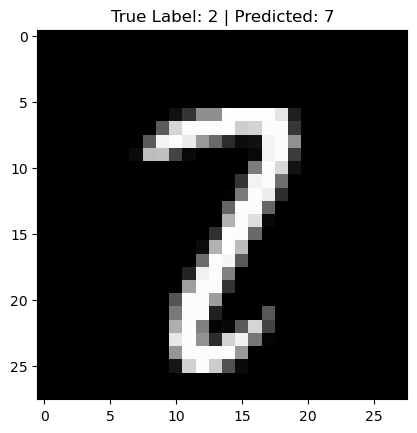

In [18]:
# Show a few misclassified images
for i in range(5):
    imshow(misclassified_images[i], f'True Label: {misclassified_labels[i].item()} | Predicted: {misclassified_preds[i].item()}')

- **`for i in range(5):`**:
  - Loops through the first 5 misclassified images.
  - **`range(5)`**: Specifies that the loop will iterate 5 times, corresponding to the first 5 images in the `misclassified_images` list.

- **`imshow(misclassified_images[i], f'True Label: {misclassified_labels[i].item()} | Predicted: {misclassified_preds[i].item()}')`**:
  - Calls the `imshow` function (defined earlier) to display each misclassified image.
  - **`misclassified_images[i]`**: Retrieves the `i`-th misclassified image from the list.
  - **`f'True Label: {misclassified_labels[i].item()} | Predicted: {misclassified_preds[i].item()}'`**:
    - Creates a formatted string that will be used as the title of the image.
    - **`misclassified_labels[i].item()`**: Retrieves the true label of the `i`-th misclassified image.
    - **`misclassified_preds[i].item()`**: Retrieves the predicted label of the `i`-th misclassified image.
    - The title will show the true label and the predicted label in the format: "True Label: X | Predicted: Y".

This block of code visualizes a few of the images that were misclassified by the model during testing. By displaying these images along with their true and predicted labels, you can gain insights into the types of errors the model is making. This can be particularly helpful for debugging and understanding the limitations of the model.